In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [26]:
df=pd.read_csv('Mobile_price_train.csv')
df_test=pd.read_csv('Mobile_price_test.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [22]:
df.shape

(2000, 21)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [24]:
df.duplicated().sum()

0

In [25]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

>Dataset is already cleaned..

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


> Price Range is the target variable 

In [156]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

> Data is distributed Equally in Target variable.. No-imbalance

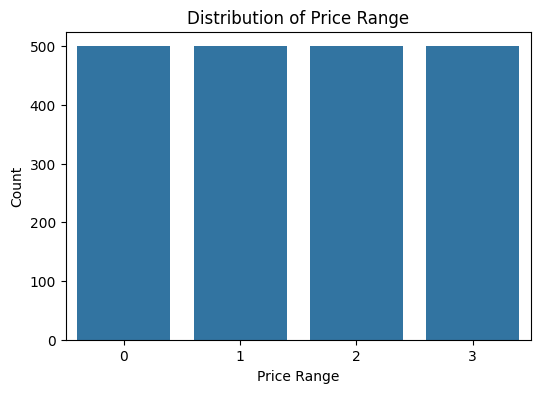

In [62]:
plt.figure(figsize=(6,4))
sns.countplot(x='price_range',data=df)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

In [63]:
# Feature vs Target Analysis
df.groupby('price_range')[['ram','battery_power','int_memory',"pc", "fc"]].mean()


,ram,battery_power,int_memory,pc,fc
price_range,,,,,
0,785.314,1116.902,31.174,9.574,4.084
1,1679.490,1228.868,32.116,9.924,4.340
2,2582.816,1228.320,30.920,10.018,4.498
3,3449.232,1379.984,33.976,10.150,4.316


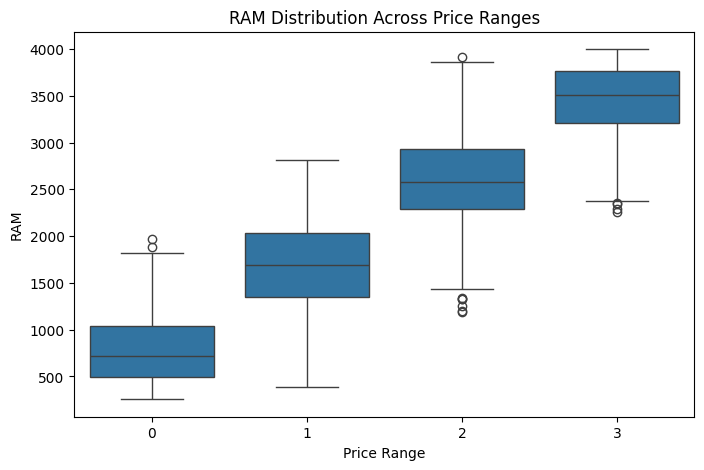

In [150]:
# Ram vs Price_range Distribution..
plt.figure(figsize=(8,5))
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('RAM Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()

-->RAM increases monotonically from price_range

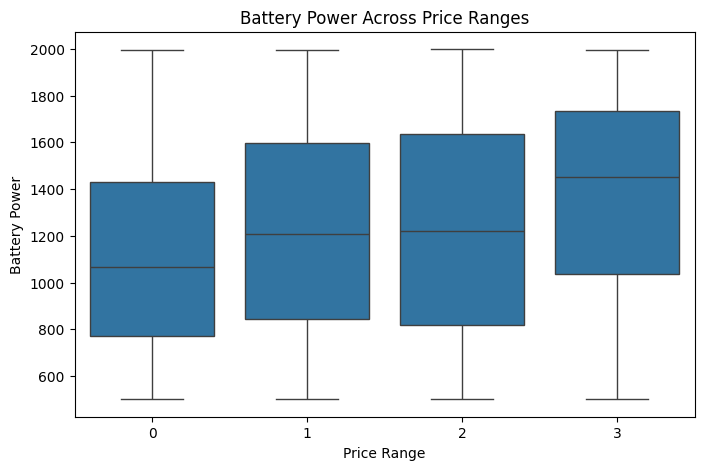

In [153]:
# Battery_Power v/s price_range..

plt.figure(figsize=(8,5))
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Battery Power Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()


-->Higher price phones tend to have higher battery power.

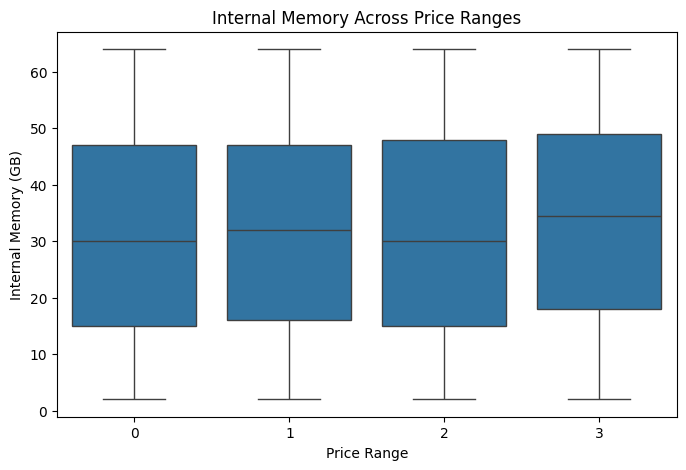

In [154]:
# Int_memory vs price_range..

plt.figure(figsize=(8,5))
sns.boxplot(x='price_range', y='int_memory', data=df)
plt.title('Internal Memory Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory (GB)')
plt.show()


-->Internal memory increases with pricey

In [76]:
# Binary Feature impact..
binary_cols=['wifi','blue','dual_sim','touch_screen','four_g']
binary_means=df.groupby('price_range')[binary_cols].mean()
# Binary features show minor variation across price ranges

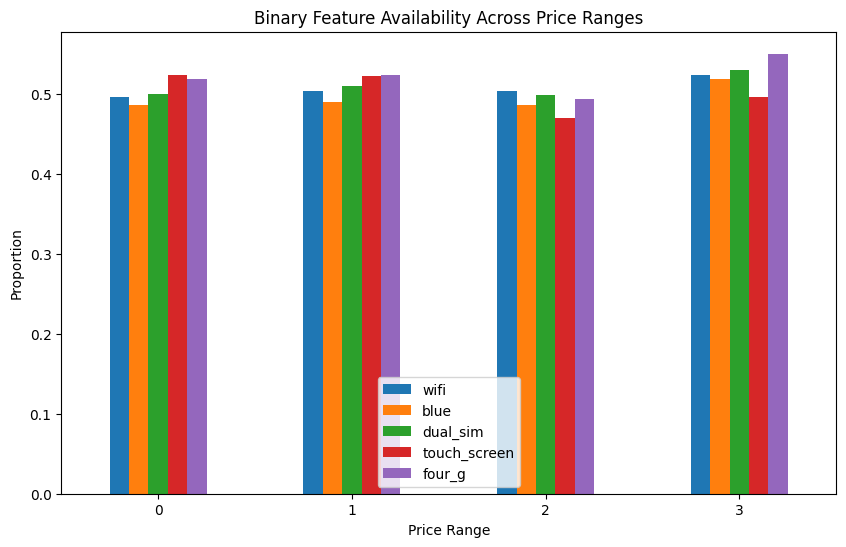

In [79]:
binary_means.plot(kind='bar', figsize=(10,6))
plt.title('Binary Feature Availability Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [59]:
corr=df.corr()
corr['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

>Strong Positive Correlation
-->ram
-->battery_power
-->int_memory

>Weak / Near-Zero Correlation
-->clock_speed
-->mobile_wt
-->touch_screen

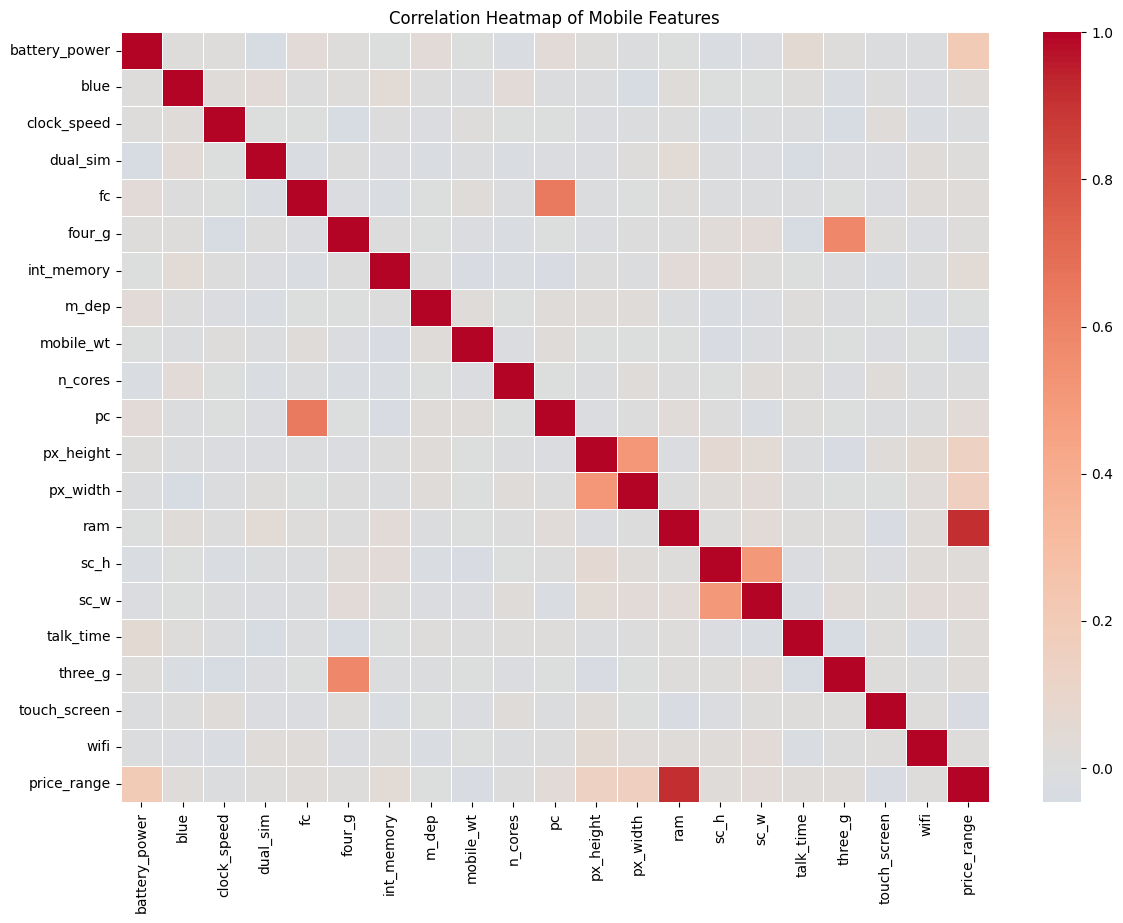

In [89]:
plt.figure(figsize=(14,10))
sns.heatmap(corr,cmap='coolwarm',center=0,annot=False,linewidths=0.5)

plt.title('Correlation Heatmap of Mobile Features')
plt.show()


In [92]:
# Train Test Split..
x=df.drop('price_range',axis=1)
y=df['price_range']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Check shapes
print("x_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


In [98]:
# Feature Scaling..
scaler=StandardScaler()
# Fit on Train Data
x_train_scaled=scaler.fit_transform(x_train)
# transoform test data
x_test_scaled=scaler.transform(x_test)

# convert back to Data Frames..
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns,index=x_train.index)

x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns,index=x_test.index)



In [106]:
# Data Modeling..
# Logistic Regression --> BaseLine model

log_reg=LogisticRegression(max_iter=1000,random_state=42)

log_reg.fit(x_train_scaled,y_train)

y_test_pred=log_reg.predict(x_test_scaled)

In [121]:
accuracy = accuracy_score(y_test, y_test_pred)
print('Validation Accuracy: \n', accuracy)
print('Classification Report: \n', classification_report(y_test, y_test_pred))
print('Confusion Metrix: \n',confusion_matrix(y_test, y_test_pred))


Validation Accuracy: 
 0.965
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400

Confusion Metrix: 
 [[98  2  0  0]
 [ 1 96  3  0]
 [ 0  2 94  4]
 [ 0  0  2 98]]


>Validation Accuracy: 96.5%
--->Its really very good for a baseline model
--->Strong linear relationship exists

In [125]:
# Co-efficient analysis..
coef_df=pd.DataFrame(log_reg.coef_,columns=x_train_scaled.columns,
                     index= log_reg.classes_)
coef_df.T

,0,1,2,3
battery_power,-2.697611,-0.867891,0.821211,2.744291
blue,0.097516,0.015880,-0.017077,-0.096319
clock_speed,0.048368,-0.076543,-0.040873,0.069048
dual_sim,0.109435,0.040693,-0.093733,-0.056395
fc,-0.006113,0.021858,0.032547,-0.048292
four_g,-0.075147,0.022800,-0.078293,0.130640
int_memory,-0.201302,-0.051832,0.003095,0.250039
m_dep,-0.012285,0.100864,-0.083252,-0.005327
mobile_wt,0.422961,0.189519,-0.008975,-0.603506
n_cores,-0.040699,-0.102128,0.062905,0.079921


* Mobile phone pricing is driven primarily by performance (RAM) and display quality, followed by battery and storage.
Connectivity and camera features contribute marginally and act as supporting signals rather than pricing drivers.

In [128]:
# DT model..
# Train Decision Tree (Baseline Tree)
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [131]:
y_test_pred_dt=dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print("Decision Tree Validation Accuracy:\n ", accuracy_dt)
print('Classification Report: \n',classification_report(y_test, y_test_pred_dt))
print('Confusion Matrix: \n',confusion_matrix(y_test, y_test_pred_dt))

Decision Tree Validation Accuracy:
  0.83
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.78      0.74      0.76       100
           2       0.75      0.80      0.77       100
           3       0.92      0.86      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix: 
 [[92  8  0  0]
 [13 74 13  0]
 [ 0 13 80  7]
 [ 0  0 14 86]]


In [133]:
results=[]
for depth in [3,5,7,10,15]:
    for leaf in [1,5,10,20]:
        dt=DecisionTreeClassifier(max_depth=depth,min_samples_leaf=leaf,random_state=42)
        dt.fit(x_train,y_train)
        y_pred=dt.predict(x_test)

        acc=accuracy_score(y_test,y_pred)
        results.append((depth, leaf, acc))

results_df=pd.DataFrame(results,columns=['max_depth', 'min_samples_leaf', 'test_accuracy'])

results_df.sort_values(by="test_accuracy", ascending=False)

,max_depth,min_samples_leaf,test_accuracy
17,15,5,0.8525
13,10,5,0.8525
9,7,5,0.8475
19,15,20,0.8425
15,10,20,0.8425
11,7,20,0.8425
18,15,10,0.8375
14,10,10,0.8375
10,7,10,0.8375
7,5,20,0.8350


>Even after tuning, a single Decision Tree cannot match Logistic Regression for this dataset, 
indicating that pricing patterns are largely linear and dominated by a few strong features like RAM.

In [137]:
# Random Forest..(Baseline RF)
rf=RandomForestClassifier(n_estimators=200,random_state=42,n_jobs=-1)
rf.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [139]:
y_test_pred_rf=rf.predict(x_test)

rf_accuracy=accuracy_score(y_test,y_test_pred_rf)
print("Random Forest Accuracy:\n", rf_accuracy)

print('Classification Report:\n',classification_report(y_test, y_test_pred_rf))
print('Confusion Metrix: \n',confusion_matrix(y_test, y_test_pred_rf))


Random Forest Accuracy:
 0.8775
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.81      0.84      0.82       100
           2       0.82      0.79      0.81       100
           3       0.94      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

Confusion Metrix: 
 [[95  5  0  0]
 [ 6 84 10  0]
 [ 0 15 79  6]
 [ 0  0  7 93]]


>Although Random Forest is a powerful model, it did not outperform Logistic Regression for this dataset. Since Logistic Regression achieved higher accuracy with better interpretability and lower complexity, I finalized it as the production model

In [140]:
final_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

In [141]:
# Features & target from full training data
X_full = df.drop('price_range', axis=1)
y_full = df['price_range']

# Scaling
scaler = StandardScaler()

X_full_scaled = scaler.fit_transform(X_full)

# Train final model
final_model.fit(X_full_scaled, y_full)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [146]:
# External test dataset..
X_test =df_test.copy()
# Drop ID column from test data
X_test = df_test.drop('id', axis=1)
# Apply same scaler
X_test_scaled=scaler.transform(X_test)

# Final predictions
test_predictions = final_model.predict(X_test_scaled)
test_predictions[:10]  



array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0], dtype=int64)

In [155]:
# Creating a column in test Data set and exporting the file..
submission = df_test.copy()
submission['predicted_price_range'] = test_predictions

submission.head()

submission.to_csv("mobile_price_predictions.csv", index=False)